In [1]:
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, metrics
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()
X, y = digits.images, digits.target
X = X.reshape(-1, 8*8)
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=0)

In [3]:
import mnist
train_X, train_y = mnist.extract_train(5000)
test_X, test_y = mnist.extract_test(100)
train_X = train_X.reshape(-1,28*28)
test_X = test_X.reshape(-1,28*28)

In [4]:
scores = [0]
for k in range(1,30):
    model = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    acc = metrics.accuracy_score(test_y, model.predict(test_X))
    scores.append(acc)
knn = KNeighborsClassifier(n_neighbors=np.argmax(scores)).fit(train_X, train_y)
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 8,
 'p': 2,
 'weights': 'uniform'}

In [5]:
metrics.accuracy_score(test_y, knn.predict(test_X))

0.96

In [6]:
test_y[:10], knn.predict(test_X[:10])

(array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64))

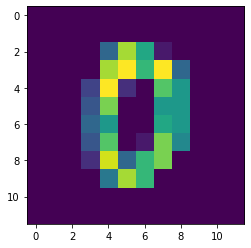

In [13]:
from skimage.transform import resize
digits = datasets.load_digits()
X = digits.images
plt.imshow(np.pad(X[0], 2))

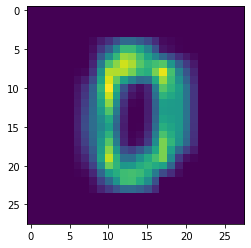

In [29]:
from skimage.transform import resize
digits = datasets.load_digits()
X, y = digits.images, digits.target
X = np.array(list(map(lambda img : resize(np.pad(img, 2), (28,28)), X)))
plt.imshow(X[0])
X = X.reshape(-1,28*28)

In [30]:
metrics.accuracy_score(y, knn.predict(X))

0.10127991096271564